In [1]:

import numpy as np
import matplotlib
import seaborn as sns
import pandas as pd
from pandas import DataFrame
#import mpl_toolkits
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.special import expit as sigmoid
sns.set()

In [2]:
path = r'C:\Users\Nursultan\Documents\Data Science\breast cancer\wdbc.data.csv'
df = pd.read_csv(path, names = ['ID', 'Diagnosis',
                    'MRadius', 'MTexture', 'Mper-ter', 'Marea', 'MSmooth-es',
                    'MComp-ness', 'MConcavity', 'MConcavPoints', 'MSymm-ry',
                    'MFractDimens', 'RadiusSE', 'TextureSE', 'Per-terSE',
                    'AreaSE', 'Smooth-esSE',
                    'Comp-nessSE', 'ConcavitySE', 'ConcavPointsSE', 
                    'Symm-rySE', 'FractDimensSE', 'WRadius', 'WTexture',
                    'WPer-ter', 'WArea', 'WSmooth-es',
                    'WComp-ness', 'WConcavity', 'WConcavPoints', 
                    'WSymm-ry', 'WFractDimens'])
df.head()

,ID,Diagnosis,MRadius,MTexture,Mper-ter,Marea,MSmooth-es,MComp-ness,MConcavity,MConcavPoints,...,WRadius,WTexture,WPer-ter,WArea,WSmooth-es,WComp-ness,WConcavity,WConcavPoints,WSymm-ry,WFractDimens
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Feature Scaling 
We can see the features are measured on different scales, and would be beneficial
for almost any classifier. It's gonna be useful for my gradient decent.

   # Standardizaiton

In [27]:

from sklearn import preprocessing
print(df.iloc[:4,3])

std_scale = preprocessing.StandardScaler().fit( df.iloc[:,2:32].values)
df_std = std_scale.transform( df.iloc[:,2:32].values)
print('Mean after standardization:')
print('   Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_std[:,2].mean(), df_std[:,5].mean()) ,\
      'Mean Smoothness={:.2f} '.format(df_std[:,6].mean()))
print('Stand. dev. after stand-tion:')
print('   Mean Radius={:.2f}, Mean Area={:.2f},'.format(df_std[:,2].std(), df_std[:,5].std()) ,\
      'Mean Smoothness={:.2f} '.format(df_std[:,6].std()))


0    10.38
1    17.77
2    21.25
3    20.38
Name: MTexture, dtype: float64
Mean after standardization:
('   Mean Radius=-0.00, Mean Area=0.00', 'Mean Smoothness=0.00, etc. ')
Stand. dev. after stand-tion:
('   Mean Radius=1.00, Mean Area=1.00,', 'Mean Smoothness=1.00, etc. ')


# Min-Max Scaling

In [40]:
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,2:32].values)
df_minmax = minmax_scale.transform(df.iloc[:,2:32].values)
print('Min value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_minmax[:,2].min(), df_minmax[:,5].min()) ,\
      'Mean Smoothness={:.2f}'.format(df_minmax[:,6].min())) 
print('Max value after min-max:')
print('  Mean Radius={:.2f}, Mean Area={:.2f}'.format(df_minmax[:,2].max(), df_minmax[:,5].max()) ,\
      'Mean Smoothness={:.2f}'.format(df_minmax[:,6].max())) 

Min value after min-max:
('  Mean Radius=0.00, Mean Area=0.00', 'Mean Smoothness=0.00')
Max value after min-max:
('  Mean Radius=1.00, Mean Area=1.00', 'Mean Smoothness=1.00')


569

# Plotting

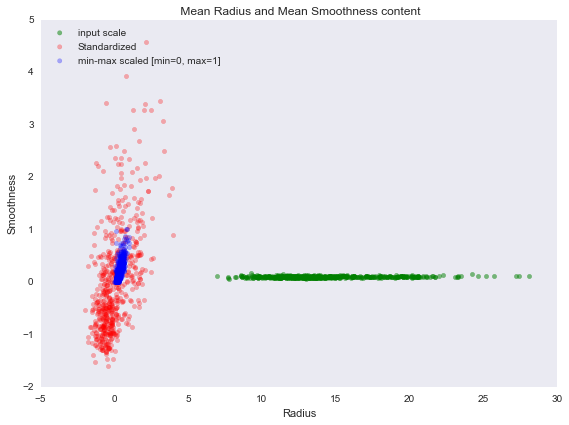

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df.iloc[:,2], df.iloc[:,6], 
               color = 'green', label='input scale', alpha=0.5)
    plt.scatter(df_std[:,2], df_std[:,5], color='red',
            label = 'Standardized', alpha=0.3)
    plt.scatter(df_minmax[:,2], df_minmax[:,6], color='blue', 
                label='min-max scaled [min=0, max=1]', alpha=0.3)
    plt.title(" Mean Radius and Mean Smoothness content")
    plt.xlabel('Radius')
    plt.ylabel('Smoothness')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()
    

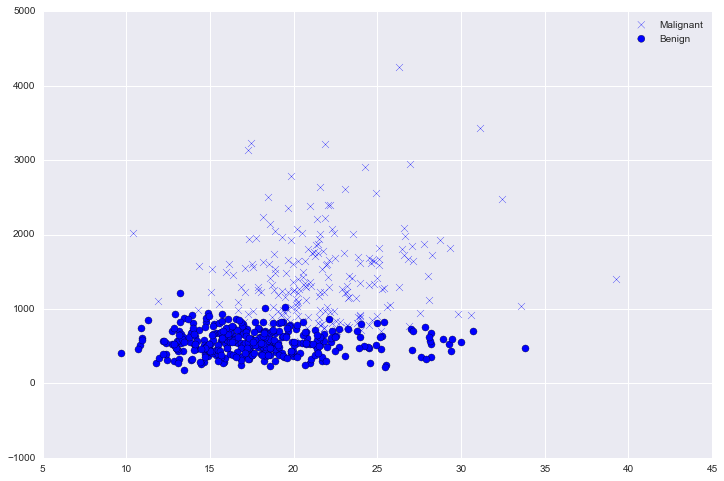

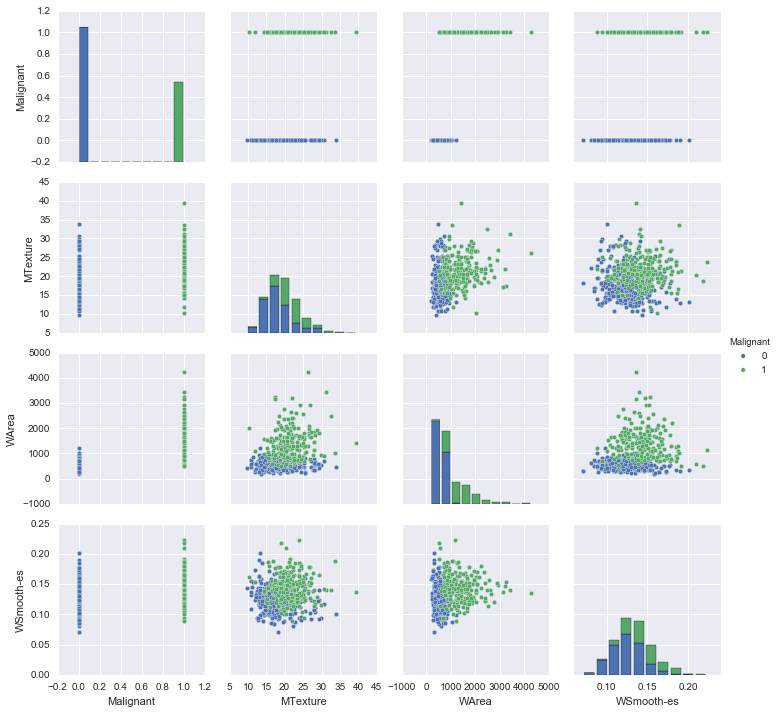

In [51]:
df['Malignant'] = df.Diagnosis.map({'B':0, 'M':1})

malignant = df[df['Malignant'].isin([1])]
benign = df[df['Malignant'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(malignant['MTexture'], malignant['WArea'], s=50, marker='x', label='Malignant')
ax.scatter(benign['MTexture'], benign['WArea'], s=50, marker='o', label='Benign')
ax.legend()

seabornMatrix = sns.pairplot(df[['Malignant','MTexture','WArea','WSmooth-es']],hue="Malignant")
seabornMatrix.savefig("SeabornMatrix.png")

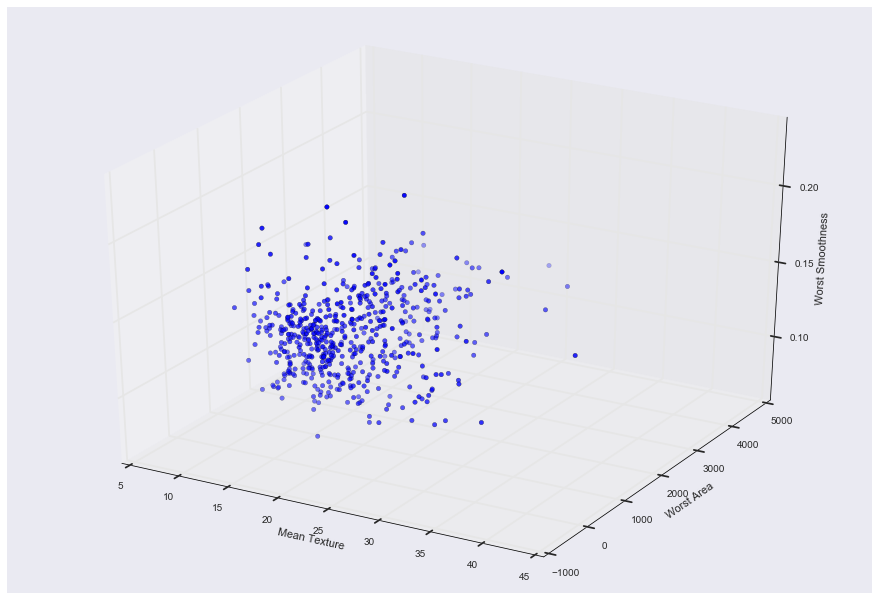

In [52]:
#df.index=range(0,569,1)
visualIn3D = plt.figure().gca(projection='3d')
fig3D = plt.gcf()
fig3D.set_size_inches(15.5, 10.5)
visualIn3D.scatter(df['MTexture'], df['WArea'], df['WSmooth-es'])
visualIn3D.set_xlabel('Mean Texture')
visualIn3D.set_ylabel('Worst Area')
visualIn3D.set_zlabel('Worst Smoothness')
plt.show()
fig3D.savefig('3D visualization.png', bbox_inches='tight')

In [ ]:
X = df.iloc[:,2:32].values

print(type(X))
#numpyMatrix = df.as_matrix()

y= df.Malignant.values
print(type(y))
#y.reshape(569,1)




In [ ]:
num_samples = len(X)
print(num_samples)
nn_inputs = 30
nn_outputs = 2
epsilon = 0.01
reg_lambda = 0.01

In [ ]:
def calc_error(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    z1 = X.dot(W1) + b1
    #a1= np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims = True)
    
    #calculating the error
    correct_logprobs = - np.log(probs[range(num_samples), y])
    error = np.sum(correct_logprobs)
    #optional regularization term
    error += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_samples * error

In [ ]:
def feed_forward(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #propagate forward
    #calc the dot product of input layer and its weights and add 1st bias term
    z1 = x.dot(W1) + b1
    #apply tanh activation function
    #a1 = np.tanh(z1)
    #using sigmoid activation function instead of hyperbolic tangent
    a1 = sigmoid(z1)
    #calc the dot product of the output of tanh func applied
    # to input layer and its weights and add 2nd bias term
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(prob, axis=1)

In [ ]:
#function to learn the param-s for the NN and return the model
# hid_dim - hidden layer dimension - # of nodes in hidden layer
# num_passes - num of passes through the training set for gradient descent
# print_loss - if true, prints the loss every 1000 iterations
def build_model(hid_dim, num_passes = 20000, print_loss=False):
    #initialize param-s randomly, we need to learn them
    np.random.seed(0)
    W1 = np.random.randn(nn_inputs, hid_dim)/ np.sqrt(nn_inputs)
    b1 = np.zeros((1, hid_dim))
    W2 = np.random.randn(hid_dim,nn_outputs) / np.sqrt(hid_dim)
    b2 = np.zeros((1, nn_outputs))
    
    model = {}
    
    #Gradient descent
    for i in xrange(0, num_passes):
        
        #feed forward
        z1 = X.dot(W1) + b1
        #a1 = np.tanh(z1)
        #using sigmoid activation function instead of hyperbolic tangent
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        #Backpropagate
        delta3 = probs
        delta3[range(num_samples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        #delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        #derivative of sigmoid function f(x) = 1./ (1+ e^(-x)) is f'(x) = f(x) * (1-f(x))
        delta2 = delta3.dot(W2.T) * (a1 * (1 - a1))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis =0)
        
        #add regularization terms (b1 and b2 aren't regularized)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #optionally print the loss
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" %(i, calc_error(model))
    return model

In [ ]:
# Build a model with a 10-dim hidden layer
model = build_model(3, print_loss=True)